In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input, InputLayer
from tensorflow.keras import optimizers
import tensorflow.keras.backend as K
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import nasnet, resnet50, densenet
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, log_loss, make_scorer, precision_recall_curve
%matplotlib inline

from main import *

%load_ext autoreload
%autoreload 2

##pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
# for train data
df = load_data('data/train.csv')
df = eda(df)

In [99]:
df.head(3)

,id,budget,popularity,runtime,revenue,num_production_companies,production_companies_Warner Bros.,production_companies_Universal Pictures,production_companies_Paramount Pictures,production_companies_Twentieth Century Fox Film Corporation,...,cast_Richard Jenkins,cast_Matt Damon,cast_Christopher Plummer,cast_Gene Hackman,cast_Christopher Walken,cast_William H. Macy,cast_James Franco,cast_Jim Broadbent,has_belongs_to_collection,has_status
0,1,14000000,6.575393,93.0,12314651,3,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
1,2,40000000,8.248895,113.0,95149435,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,3,3300000,64.299990,105.0,13092000,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [100]:
df.corr()

,id,budget,popularity,runtime,revenue,num_production_companies,production_companies_Warner Bros.,production_companies_Universal Pictures,production_companies_Paramount Pictures,production_companies_Twentieth Century Fox Film Corporation,...,cast_Richard Jenkins,cast_Matt Damon,cast_Christopher Plummer,cast_Gene Hackman,cast_Christopher Walken,cast_William H. Macy,cast_James Franco,cast_Jim Broadbent,has_belongs_to_collection,has_status
id,1.000000,0.019732,-0.007470,0.010748,0.000610,0.000435,-0.008383,-0.028613,0.011488,0.011348,...,0.023914,0.016904,0.001070,-0.010371,0.012671,-0.023059,-0.015019,-0.015320,-0.010010,0.016328
budget,0.019732,1.000000,0.342356,0.238350,0.752965,0.253386,0.174372,0.086593,0.088209,0.091510,...,0.035692,0.073788,0.020442,0.020000,0.026606,0.014347,0.025130,0.084572,0.222932,0.022019
popularity,-0.007470,0.342356,1.000000,0.133669,0.461460,0.155638,0.080712,0.028369,0.031652,0.076684,...,0.007249,0.020712,-0.000591,-0.010492,-0.005651,0.000086,0.006551,0.011797,0.155896,0.013791
runtime,0.010748,0.238350,0.133669,1.000000,0.216363,0.089603,0.076582,0.041367,0.024328,0.011302,...,0.012964,0.043210,0.029451,0.042584,0.038016,-0.002717,0.038206,0.031925,-0.036916,0.050660
revenue,0.000610,0.752965,0.461460,0.216363,1.000000,0.155700,0.116787,0.080496,0.100544,0.075430,...,0.009385,0.036882,-0.000254,0.004410,0.008311,0.004461,-0.004989,0.074058,0.339425,0.016806
num_production_companies,0.000435,0.253386,0.155638,0.089603,0.155700,1.000000,0.049147,0.047788,-0.009866,0.063710,...,-0.010102,0.069226,0.041171,-0.021425,-0.006820,0.005700,0.034911,0.053690,0.007928,0.044424
production_companies_Warner Bros.,-0.008383,0.174372,0.080712,0.076582,0.116787,0.049147,1.000000,-0.071886,-0.060075,-0.054510,...,-0.022648,0.025200,0.027012,-0.005710,0.010651,-0.005710,-0.005710,-0.005710,0.045689,0.010101
production_companies_Universal Pictures,-0.028613,0.086593,0.028369,0.041367,0.080496,0.047788,-0.071886,1.000000,-0.055850,-0.057099,...,0.029151,0.045969,-0.003508,0.013744,0.013744,0.013744,0.013744,-0.003508,0.063981,0.009501
production_companies_Paramount Pictures,0.011488,0.088209,0.031652,0.024328,0.100544,-0.009866,-0.060075,-0.055850,1.000000,-0.045231,...,-0.001333,-0.001333,-0.000367,-0.000367,-0.000367,0.018279,-0.019012,-0.000367,0.057488,0.008701
production_companies_Twentieth Century Fox Film Corporation,0.011348,0.091510,0.076684,0.011302,0.075430,0.063710,-0.054510,-0.057099,-0.045231,1.000000,...,0.001564,0.060225,-0.017531,0.022585,0.002527,0.022585,0.002527,0.002527,0.048475,0.008023


In [101]:
X, y = split(df)

In [102]:
X.columns

Index(['id', 'budget', 'popularity', 'runtime', 'num_production_companies',
       'production_companies_Warner Bros.',
       'production_companies_Universal Pictures',
       'production_companies_Paramount Pictures',
       'production_companies_Twentieth Century Fox Film Corporation',
       'production_companies_Columbia Pictures',
       'production_companies_Metro-Goldwyn-Mayer (MGM)',
       'production_companies_New Line Cinema',
       'production_companies_Touchstone Pictures',
       'production_companies_Walt Disney Pictures',
       'production_companies_Columbia Pictures Corporation',
       'production_companies_TriStar Pictures',
       'production_companies_Relativity Media', 'production_companies_Canal+',
       'production_companies_United Artists',
       'production_companies_Miramax Films',
       'production_companies_Village Roadshow Pictures',
       'production_companies_Regency Enterprises',
       'production_companies_BBC Films',
       'production_compani

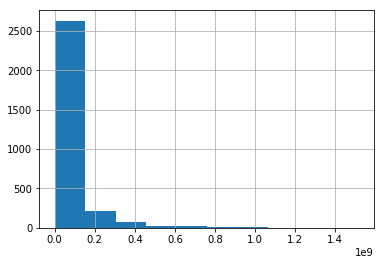

In [103]:
y.hist()

In [104]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

In [105]:
# scale data
scalar = StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

C:\Users\eka06n0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\eka06n0\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\eka06n0\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [106]:
X_train.shape

(2400, 63)

##Nural Network Model

In [107]:
nnm = Sequential()
nnm.add(Dense(units=500, activation='relu', input_shape=(63,), name='L1'))
nnm.add(Dense(units=100, activation='relu', name='L2'))
nnm.add(Dense(units=60, activation='relu', name='L3'))
nnm.add(Dense(units=20, activation='linear', name='L4'))
# nnm.add(Dense(units=10, activation='linear', name='L5'))
nnm.add(Dense(units=1, activation='linear', name='Output'))

In [108]:
##opt = optimizers.SGD()
opt = optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
#opt = optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nnm.compile(loss='mse', optimizer=opt, metrics=['mse'])
nnm.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 500)               32000     
_________________________________________________________________
L2 (Dense)                   (None, 100)               50100     
_________________________________________________________________
L3 (Dense)                   (None, 60)                6060      
_________________________________________________________________
L4 (Dense)                   (None, 20)                1220      
_________________________________________________________________
Output (Dense)               (None, 1)                 21        
Total params: 89,401
Trainable params: 89,401
Non-trainable params: 0
_________________________________________________________________


In [109]:
history = nnm.fit(X_train, y_train, epochs=200, batch_size=30, verbose=1, validation_split=0.3, shuffle=True)

Train on 1680 samples, validate on 720 samples
Epoch 1/200
1680/1680 [==============================] - 0s 192us/sample - loss: 23592441936347136.0000 - mse: 23592444335489024.0000 - val_loss: 10926648392155136.0000 - val_mse: 10926646982868992.0000
Epoch 2/200
1680/1680 [==============================] - 0s 73us/sample - loss: 9652382816272384.0000 - mse: 9652383873236992.0000 - val_loss: 7170269760192512.0000 - val_mse: 7170269659529216.0000
Epoch 3/200
1680/1680 [==============================] - 0s 70us/sample - loss: 7379730510942794.0000 - mse: 7379731456458752.0000 - val_loss: 5753178055595349.0000 - val_mse: 5753177949339648.0000
Epoch 4/200
1680/1680 [==============================] - 0s 69us/sample - loss: 6487751284677486.0000 - mse: 6487751037812736.0000 - val_loss: 5918185514947925.0000 - val_mse: 5918185224142848.0000
Epoch 5/200
1680/1680 [==============================] - 0s 70us/sample - loss: 5817355802546762.0000 - mse: 5817355498160128.0000 - val_loss: 6119640897246

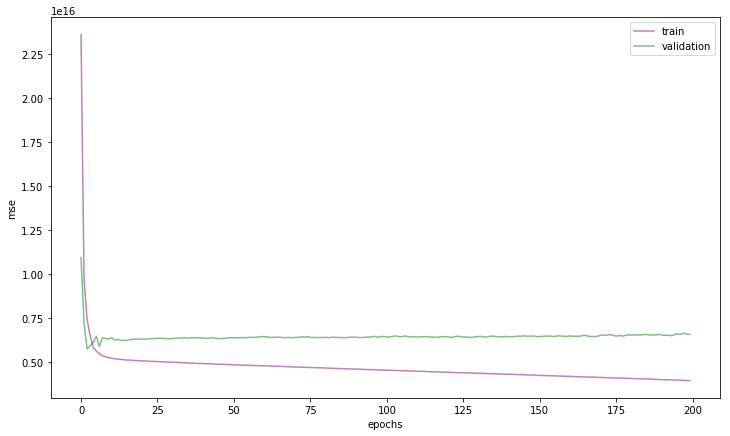

In [110]:
plt.figure(figsize=(12, 7))
plt.plot(history.epoch, history.history['mse'], color='purple', alpha=0.5, label='train')
plt.plot(history.epoch, history.history['val_mse'], color='green', alpha=0.5, label='validation')
plt.xlabel('epochs')
plt.ylabel('mse')

plt.legend()
plt.show()

In [111]:
### for test data
df1 = pd.read_csv('data/test.csv')
df1 = eda(df1)
X1 = df1

In [112]:
X1.shape

(4398, 63)

In [113]:
# scale data
scalar = StandardScaler().fit(X1)
X1 = scalar.transform(X1)

C:\Users\eka06n0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\eka06n0\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [114]:
X1.shape

(4398, 63)

In [115]:
yt = nnm.predict(X1)
yt

array([[46736650.],
       [15989330.],
       [13342006.],
       ...,
       [75807496.],
       [36927172.],
       [16635172.]], dtype=float32)

In [116]:
yt = nnm.predict(X1)
yt = yt.reshape(len(yt))
out = np.array([df1.id, yt]).T

out = pd.DataFrame(out)
out.columns = ['ID', 'Revenue']
out['ID'] = out.ID.astype('int64')
out.to_csv('Revenue_out4.csv', index=None)

In [117]:
### randon boost 

In [118]:
###Grid Search Gradient Boosting
gradient_boosting_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
                          'max_depth': [2, 4, 6],
                          'min_samples_leaf': [1, 2, 5, 10],
                          'max_features': [1.0, 0.3, 0.1],
                          'n_estimators': [20],
                          'random_state': [1]}


gbr_gridsearch = GridSearchCV(GradientBoostingRegressor(),
                             gradient_boosting_grid,
                             verbose=True,
                             scoring='neg_mean_squared_error')

gbr_gridsearch.fit(X_train, y_train)

C:\Users\eka06n0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=1)]: Done 432 out of 432 | elapsed:   20.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.1, 0.05, 0.02, 0.01], 'max_depth': [2, 4, 6], 'min_samples_leaf': [1, 2, 5, 10], 'max_features': [1.0, 0.3, 0.1], 'n_estimators': [20], 'random_state': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=True)

In [119]:
print( "best parameters:", gbr_gridsearch.best_params_ )

best_gbr_model = gbr_gridsearch.best_estimator_

best parameters: {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 0.3, 'min_samples_leaf': 5, 'n_estimators': 20, 'random_state': 1}


In [120]:
(best_gbr_model.predict(X_test)).size

600

In [121]:
# mse for grid searched random forest
mean_squared_error(y_test, best_gbr_model.predict(X_test))

7469783892916384.0

In [122]:
# # the precision? Recall?
# precision_score(y_test, best_gbr_model.predict(X_test))
# recall_score(y_test, best_gbr_model.predict(X_test))

In [123]:
best_gbr_model.predict(X1).size

4398

In [124]:
out = np.array([df1.id, best_gbr_model.predict(X1)]).T

out = pd.DataFrame(out)
out.columns = ['ID', 'Revenue']
out['ID'] = out.ID.astype('int64')
out.to_csv('Revenue_out5.csv', index=None)

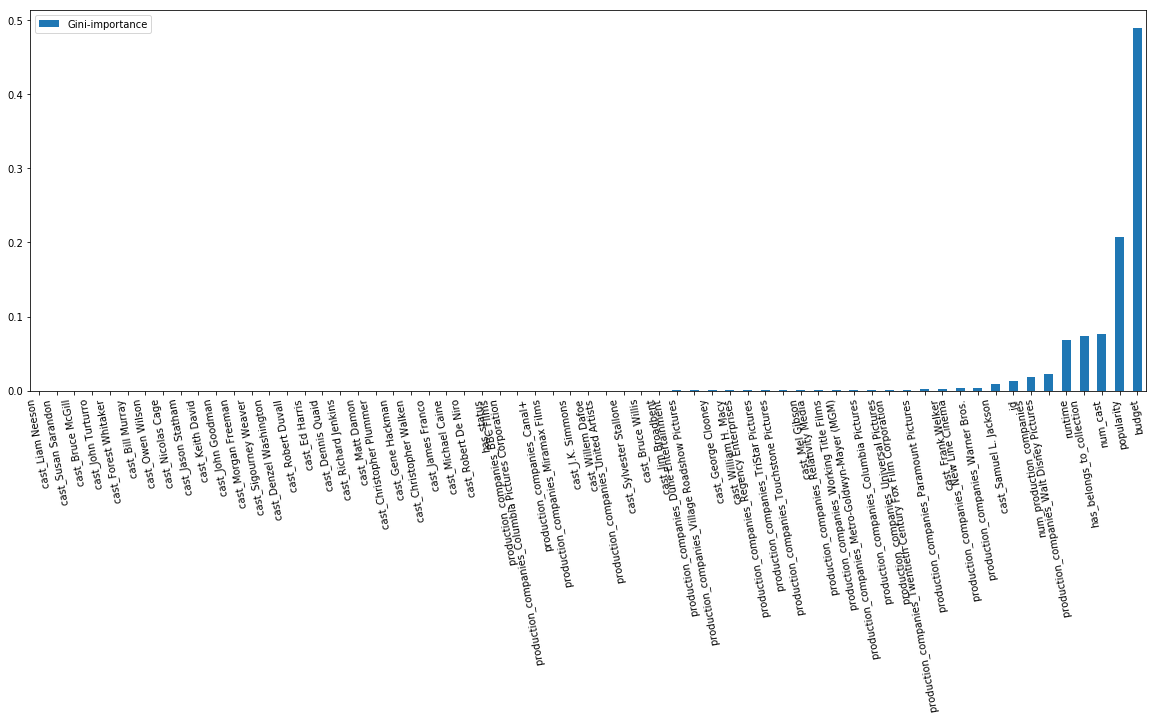

In [127]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, best_gbr_model.feature_importances_):
  feats[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=100, figsize=(20, 7))